# What do Australians think of Donald Trump and the use of tariffs on Mastodon?


<img src="mastodon_thinking_swinging_question.gif" width="600">

In [429]:
from datetime import datetime, timedelta, timezone
import importlib
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_sentiment_trend_with_events, plot_animated_sentiment_trend, plot_post_volume_with_events, plot_combined_sentiment_volume, plot_keyword_sentiment_bubble, plot_keyword_sentiment_trend, plot_keyword_distribution_stacked, plot_subreddit_sentiment_map, plot_platform_sentiment_only, plot_merged_keyword_trend
import api_utils
importlib.reload(api_utils)
from api_utils import get_summary_stats, get_mastodon_posts, get_mastodon_data,fetch_subreddit_stats, get_keyword_stats_over_time, merge_keywords, merge_keywords_over_time, fetch_reddit_keyword_stats, merge_keyword_variants

## 📉 How Do Australians Feel About Trump on Mastodon After the Tariff? 

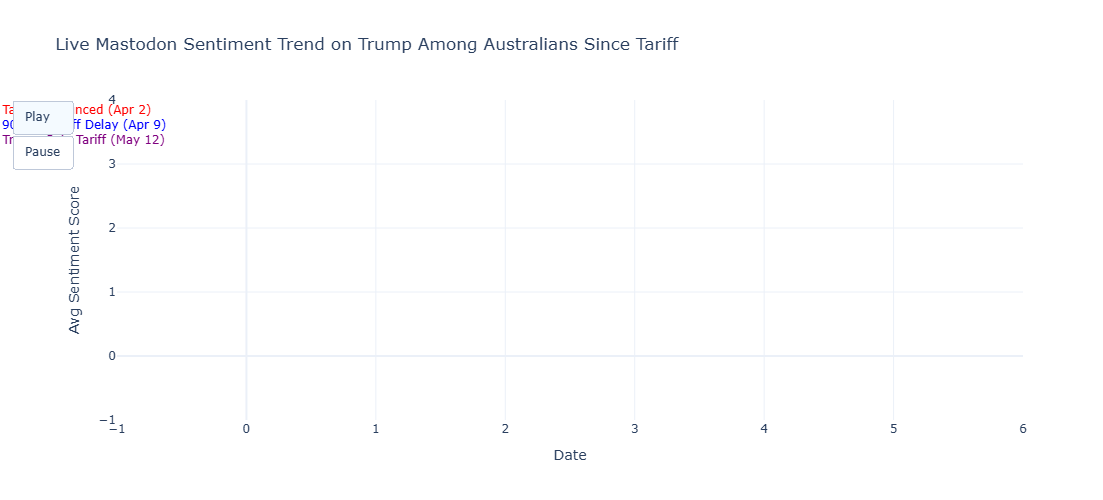

In [182]:
fig = plot_animated_sentiment_trend(df_plot, [
    ("2025-04-02", "Tariff Announced (Apr 2)", "red", 0),
    ("2025-04-09", "90-Day Tariff Delay (Apr 9)", "blue", -15),
    ("2025-05-12", "Trump Cuts Tariff (May 12)", "purple", -30)
])
fig.show()

## 📈 How Much Are Australians Talking About Trump on Mastodon Since the Tariff?

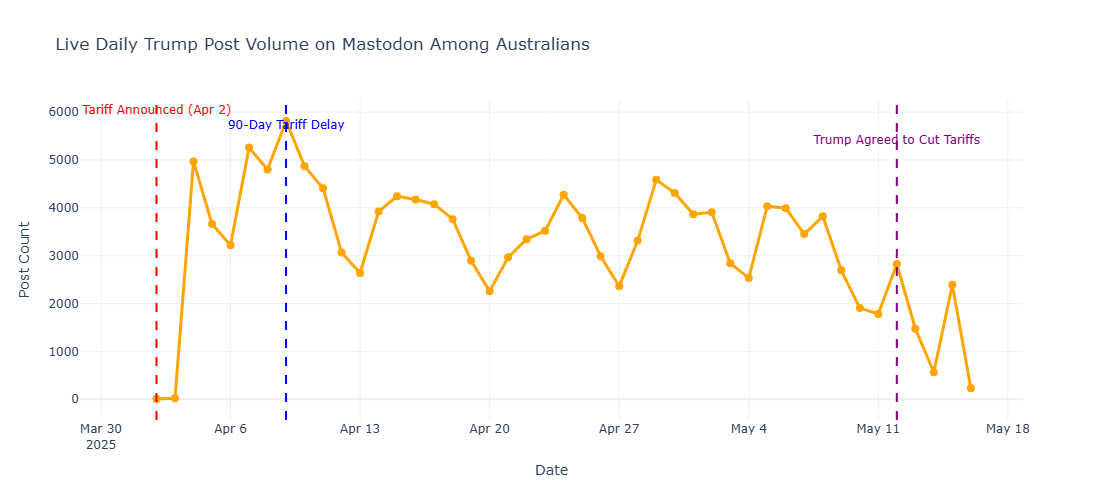

In [206]:
fig = plot_post_volume_with_events("2025-04-02", get_summary_stats)
fig.show()

## 📊 How Do Australians Talk and Feel About Trump on Mastodon Since the Tariff?

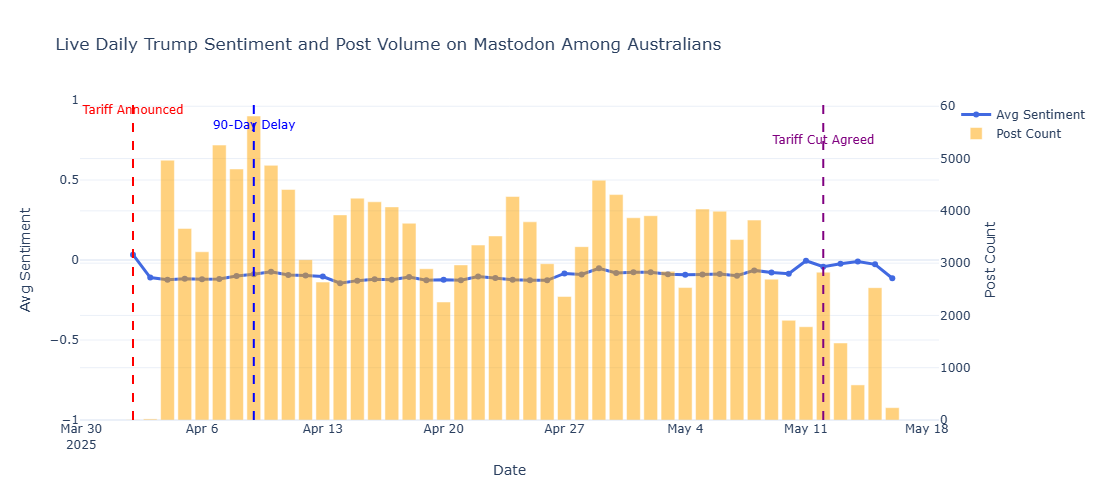

In [213]:
fig = plot_combined_sentiment_volume("2025-04-02", get_summary_stats)
fig.show()

## 🔵 How Trump-related Keyword Count and Feel on Mastodon Among Australians Since the Today?

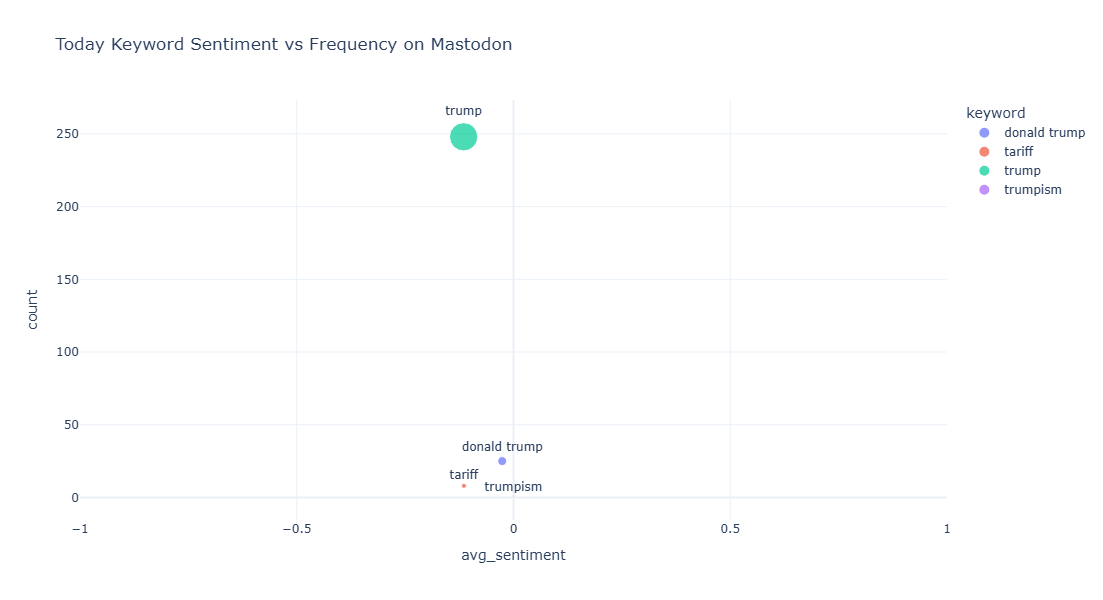

In [243]:
merge_map = {"tariffs": "tariff"}
today_str = datetime.now(timezone.utc).strftime("%Y-%m-%d")
df = get_mastodon_data(today_str, today_str)
df_merged = merge_keywords(df, merge_map)

fig = plot_keyword_sentiment_bubble(df_merged)
fig.show()

## 📈 How Have Australians Felt Based on Trump-Related Keywords on Mastodon Since the Tariff?

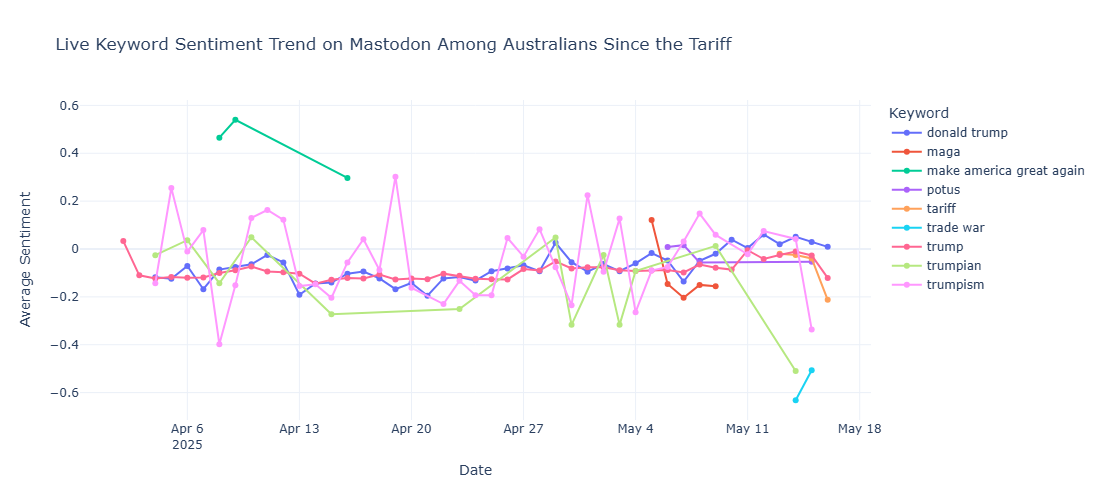

In [436]:
df_all = get_keyword_stats_over_time("2025-04-02")
merge_map = {"tariffs": "tariff"}
df_merged = merge_keywords_over_time(df_all, merge_map)
df_filtered = df_merged[df_merged["count"] >= 5]
fig = plot_keyword_sentiment_trend(df_filtered)
fig.show()

## 📈 How Have Australians Felt About Tariff on Mastodon?

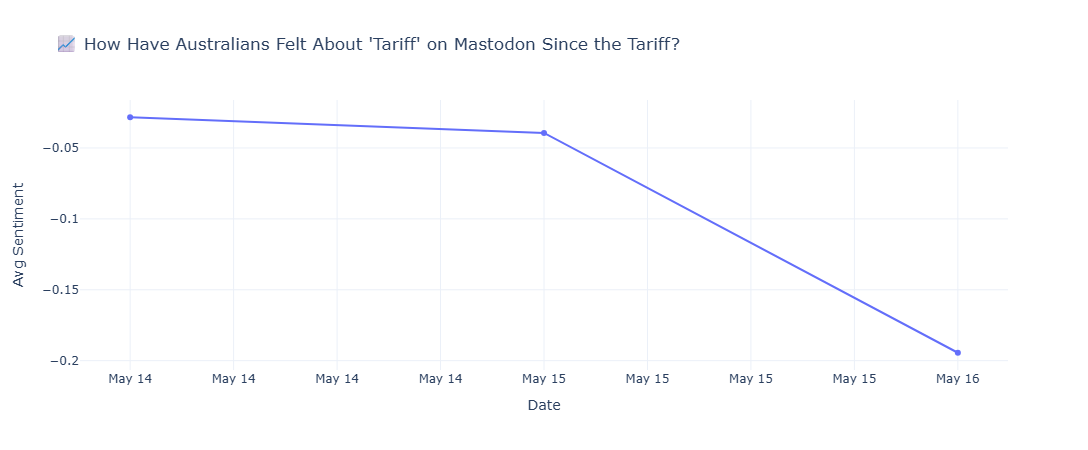

In [431]:
fig = plot_merged_keyword_trend(df_all, keywords=["tariff", "tariffs"], label="tariff")
fig.show()

## 📊 How Has the Focus of Trump-Related Discussion Shifted Among Australians on Mastodon Since the Tariff?

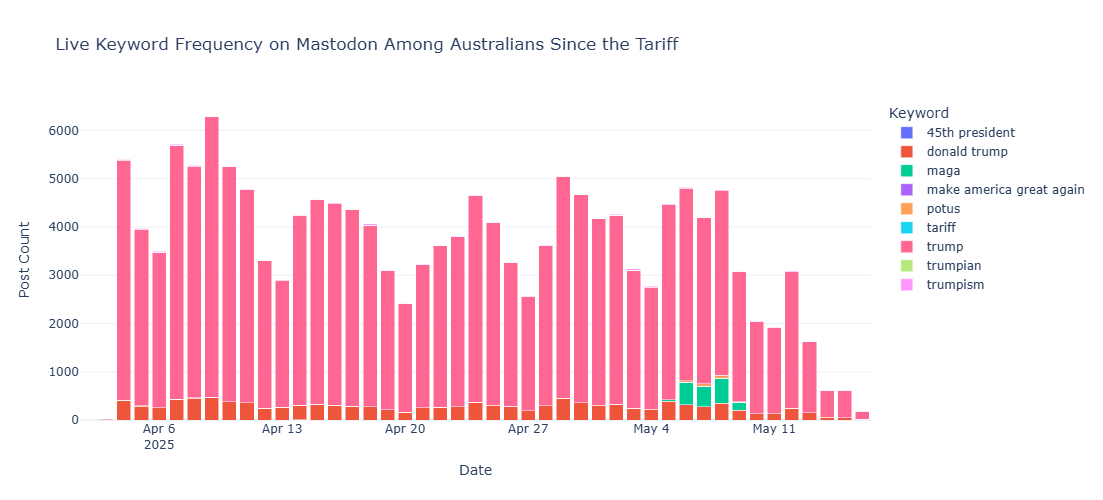

In [308]:
fig = plot_keyword_distribution_stacked(df_kw, merge_map=merge_map)
fig.show()

## 🗺️ How Do Australians Across different Subreddits Talk and Feel About Trump?

In [407]:
df = fetch_subreddit_stats("2025-05-01", "2025-05-15")
m = plot_subreddit_sentiment_map(df)
m 

## 📊 How Do Sentiments Around Key Topics Differ Between Reddit and Mastodon?

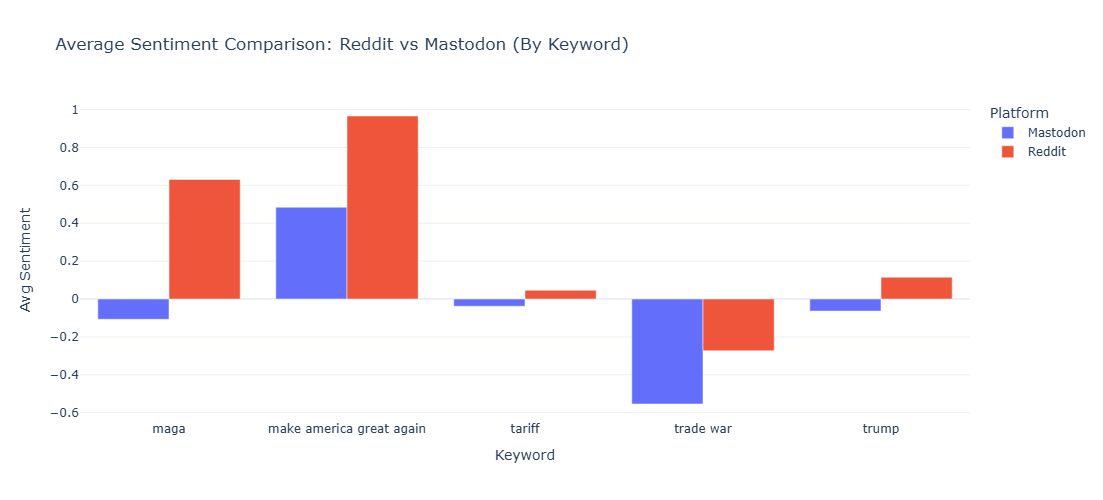

In [360]:
df_masto = get_keyword_stats_over_time("2025-05-01", "2025-05-15")
df_masto_summary = df_masto.groupby("keyword").agg(
    count=("count", "sum"),
    avg_sentiment=("avg_sentiment", "mean")
).reset_index()

df_masto_clean = merge_keyword_variants(df_masto_summary, merge_map)
df_reddit_clean = merge_keyword_variants(df_reddit, merge_map)
fig = plot_platform_sentiment_only(df_masto_clean, df_reddit_clean)
fig.show()